# Carregar bibliotecas

In [13]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import metrics
from scipy import ndimage, signal

In [2]:
print("Using torch", torch.__version__)

Using torch 2.3.0


In [ ]:
def meu_conv(img, mask, s=1):
    lin, col = img.shape[:2]
    for i,x in enumerate(range(0,lin,s)):
        for j,y in enumerate(range(0,col,s)):


# Camada Convolutional

<p>
<b>torch.nn.Conv2d</b>(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)
</p>

Parameters:

<p>
<ul>
    <li>in_channels (int) – Number of channels in the input image</li>
    <li>out_channels (int) – Number of channels produced by the convolution</li>
    <li>kernel_size (int or tuple) – Size of the convolving kernel</li>
    <li>stride (int or tuple, optional) – Stride of the convolution. Default: 1</li>
    <li>padding (int, tuple or str, optional) – Padding added to all four sides of the input. Default: 0</li>
    <li>padding_mode (str, optional) – 'zeros', 'reflect', 'replicate' or 'circular'. Default: 'zeros'</li>
    <li>dilation (int or tuple, optional) – Spacing between kernel elements. Default: 1</li>
    <li>groups (int, optional) – Number of blocked connections from input channels to output channels. Default: 1</li>
    <li>bias (bool, optional) – If True, adds a learnable bias to the output. Default: True</li>
</ul>
</p>



















In [14]:
# With square kernels and equal stride
#m = nn.Conv2d(16, 33, 3, stride=2)
# non-square kernels and unequal stride and with padding
#m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
# non-square kernels and unequal stride and with padding and dilation
m = nn.Conv2d(3, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
input = torch.randn(20, 3, 50, 100)
output = m(input)
print(output.shape)

torch.Size([20, 33, 26, 100])


## Camada de Pooling
<p>
<b>torch.nn.MaxPool2d</b>(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)
</p>

Parameters:

<p>
<ul>
    <li>kernel_size (Union[int, Tuple[int, int]]) – the size of the window to take a max over</li>
    <li>stride (Union[int, Tuple[int, int]]) – the stride of the window. Default value is kernel_size</li>
    <li>padding (Union[int, Tuple[int, int]]) – Implicit negative infinity padding to be added on both sides</li>
    <li>dilation (Union[int, Tuple[int, int]]) – a parameter that controls the stride of elements in the window</li>
    <li>return_indices (bool) – if True, will return the max indices along with the outputs. Useful for torch.nn.MaxUnpool2d later</li>
    <li>ceil_mode (bool) – when True, will use ceil instead of floor to compute the output shape</li>
</ul>
</p>

<p>
<b>torch.nn.AvgPool2d</b>(kernel_size, stride=None, padding=0, ceil_mode=False, count_include_pad=True, divisor_override=None)
</p>

Parameters:

<p>
<ul>
    <li>kernel_size (Union[int, Tuple[int, int]]) – the size of the window</li>
    <li>stride (Union[int, Tuple[int, int]]) – the stride of the window. Default value is kernel_size</li>
    <li>padding (Union[int, Tuple[int, int]]) – implicit zero padding to be added on both sides</li>
    <li>ceil_mode (bool) – when True, will use ceil instead of floor to compute the output shape</li>
    <li>count_include_pad (bool) – when True, will include the zero-padding in the averaging calculation</li>
    <li>divisor_override (Optional[int]) – if specified, it will be used as divisor, otherwise size of the pooling region will be used.</li>
</ul>
</p>


In [15]:
# pool of square window of size=3, stride=2
m = nn.MaxPool2d(3, stride=2)
# pool of non-square window
#m = nn.MaxPool2d((3, 2), stride=(2, 1))
input = torch.randn(20, 16, 50, 32)
output = m(input)
print(output.shape)

torch.Size([20, 16, 24, 15])


# Dropout

<p>
<b>torch.nn.Dropout</b>(p=0.5, inplace=False): During training, randomly zeroes some of the elements of the input tensor with probability p using samples from a Bernoulli distribution.

The outputs are scaled by a factor of $\frac{1}{1-p}$ during training. This means that during evaluation the module simply computes an identity function.

</p>

Parameters:

<p>
<ul>
    <li>p (float) – probability of an element to be zeroed. Default: 0.5</li>
    <li>inplace (bool) – If set to True, will do this operation in-place. Default: False</li>
</ul>
</p>

<p>
<b>torch.nn.Dropout2d</b>(p=0.5, inplace=False)
</p>

Parameters:

<p>
<ul>
    <li>p (float) – probability of an element to be zeroed. Default: 0.5</li>
    <li>inplace (bool) – If set to True, will do this operation in-place. Default: False</li>
</ul>
</p>

In [17]:
m = nn.Dropout(p=0.2)
input = torch.ones(4, 8)
output = m(input)
print(output.shape)
print(input[1,:7])
print(output[1,:7])
print(torch.sum(output == 0))
print(1/(1-0.2))


torch.Size([4, 8])
tensor([1., 1., 1., 1., 1., 1., 1.])
tensor([1.2500, 1.2500, 1.2500, 0.0000, 1.2500, 1.2500, 1.2500])
tensor(5)
1.25


In [8]:
print(4*8*.2)

6.4


In [18]:
m = nn.Dropout2d(p=0.2)
input = torch.randn(20, 16, 32, 32)
output = m(input)
print(output[0,:, 2,2])

tensor([ 0.7695, -0.6022, -0.3029,  0.1243,  0.5033, -0.9744,  1.6587, -1.4976,
        -1.0868, -1.0131,  0.0000,  1.4593, -0.2790,  1.3901, -0.0000,  0.1741])


In [20]:
print(output[0,9,:3,:3])

tensor([[-1.2620, -0.9061,  1.0282],
        [ 0.9971,  0.7160,  0.3163],
        [-2.1207, -0.1684, -1.0131]])


# Funções de ativação

<b>torch.nn.ReLU</b>(inplace=False). Applies the rectified linear unit function element-wise:
$ReLU(x) = max(0,x)$

<b>torch.nn.Sigmoid</b>(*args, **kwargs). Applies the element-wise function: 
$$\frac{1}{1+exp(x)}$$

<b>torch.nn.Tanh</b>(*args, **kwargs). Applies the Hyperbolic Tangent (Tanh) function element-wise.Tanh is defined as: $$Tanh(x) = \frac{exp(x)-exp(-x)}{exp(x)+exp(-x)}$$

# Função de perda (Loss function)

<b>torch.nn.L1Loss</b>(size_average=None, reduce=None, reduction='mean'): Creates a criterion that measures the mean absolute error (MAE) between each element in the input $x$ and target $y$.

Parameter:
<p>
<ul>
    <li>reduction (str, optional) – Specifies the reduction to apply to the output: 'none' | 'mean' | 'sum'. 'none': no reduction will be applied, 'mean': the sum of the output will be divided by the number of elements in the output, 'sum': the output will be summed. Note: size_average and reduce are in the process of being deprecated, and in the meantime, specifying either of those two args will override reduction. Default: 'mean'</li>
</ul>
</p>

<b>torch.nn.MSELoss</b>(size_average=None, reduce=None, reduction='mean')

<b>torch.nn.CrossEntropyLoss</b>(weight=None, size_average=None, ignore_index=- 100, reduce=None, reduction='mean', label_smoothing=0.0): It is useful when training a classification problem with $C$ classes. If provided, the optional argument weight should be a 1D Tensor assigning weight to each of the classes. This is particularly useful when you have an unbalanced training set.







In [9]:
loss = nn.L1Loss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5)
output = loss(input, target)
output.backward()

# Função de otimização

<b>torch.optim.SGD</b>(params, lr=<required parameter>, momentum=0, dampening=0, weight_decay=0, nesterov=False, *, maximize=False, foreach=None, differentiable=False)

<b>torch.optim.Adagrad</b>(params, lr=0.01, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10, foreach=None, *, maximize=False, differentiable=False). Implements Adagrad algorithm.

<b>torch.optim.Adadelta</b>(params, lr=1.0, rho=0.9, eps=1e-06, weight_decay=0, foreach=None, *, maximize=False, differentiable=False)

<b>torch.optim.RMSprop</b>(params, lr=0.01, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False, foreach=None, maximize=False, differentiable=False)

In [22]:
#optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
#optimizer.zero_grad()
#loss_fn(model(input), target).backward()
#optimizer.step()

# Contenedores

<b>torch.nn.Sequential</b>(*args: Module)

<b>torch.nn.Sequential</b>(arg: OrderedDict[str, Module])

O nn.Sequential é um contêiner ordenado de módulos. Os dados são passados por todos os módulos na ordem definida. É possível utilizar contêineres em sequência para montar uma rede rápida


In [21]:
seq_modules = nn.Sequential(
    nn.Linear(10,20),
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,10)
logits = seq_modules(input_image)

# Formato para criar uma Rede Neural
<p>O formato para criar uma rede neural usando o método de classe é o seguinte</p>
<!--
<table><tr>
<td> <img src="https://drive.google.com/uc?id=1ExhUVoHaj2i4gN1UWC6U7RfP-boZhnRL" alt="Drawing"  width="300"/> </td>
<td> <img src="https://drive.google.com/uc?id=1BGJbV6sXNNlt2PmIZ7RCyHpQfPRpZgJ6" alt="Drawing"  width="300"/> </td>
<td> <img src="https://drive.google.com/uc?id=1d3bAvzHJ5wRwPxIXGZXiUhP7bA5o0SbY" alt="Drawing"  width="300"/> </td>
</tr></table>
-->
<img src="ClassRNA.png" alt="Drawing"  width="400"/>

<p>No método <i>__init()__</i> são definidas as camadas e outras variáveis e no método <i>forward()</i> é definido como os dados fluem através das camadas.</p>

<img src="ClassRNAImplementation.png" alt="Drawing"  width="400"/>

Logo, define-se a função de perda e o otimizador. Os otimizadores definem como os pesos da rede neural devem ser atualizados, e a função de perda ou custo mede a discrepância entre a previsão de um algoritmo e a saída supervisionada, e representa o custo de estar errado. A continuação é definida a função de perda CrossEntropyLoss(), que é a combinação de log_softmax() e NLLLoss(), e o optimizador SGD Optimizer.

<img src="criterion_optimizer.png" alt="Drawing"  width="500"/>

# Implementar a rede Lenet
<img src="pytorch_cnn_lenet.webp" alt="Drawing"  width="500"/>

<p>
A arquitetura LeNet foi proposta por um dos avôs do aprendizado profundo, Yann LeCunn. Pelos padrões de hoje, o LeNet é uma rede neural muito rasa, composta pelas seguintes camadas:

(CONV => RELU => POOL) * 2 => FC => RELU => FC => SOFTMAX
</p>


In [12]:
class Lenet(nn.Module):
    def __init__(self, numChannels, classes):
        # chamar o construtor da classe Base (Pai)
        super(Lenet, self).__init__()

        # definição das camadas convolucionais
        self.conv_layers = nn.Sequential(
            # primeiro grupo convolucional
            nn.Conv2d(in_channels = numChannels, out_channels=20, kernel_size=5, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # segundo grupo convolucional
            nn.Conv2d(in_channels = 20, out_channels=50, kernel_size=5, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),            
        )
        # definiçao das camadas fully connected
        self.dense_layers = nn.Sequential(
            nn.Linear(in_features=800, out_features=500),
            nn.ReLU(),
            nn.Linear(in_features=500, out_features=classes)
        )
    def forward(self, x):
        out = self.conv_layers(x)
        out = out.view(out.size(0), -1)
        #out = nn.Flatten(out, start_dim = 1)
        out = self.dense_layers(out)
        return out

In [22]:
def neuronios_convolucional(W, F, S, P):
    return int( (W-F+2*P)/S+1 )

In [23]:
def neuronios_pooling(W, F, S):
    return int( (W-F)/S+1 )

In [24]:
tam_conv1 = neuronios_pooling(neuronios_convolucional(28, 5, 1, 0), 2, 2)
tam_conv2 = neuronios_pooling(neuronios_convolucional(tam_conv1, 5, 1, 0), 2, 2)
print(tam_conv1)
print(tam_conv2)
print(tam_conv2*tam_conv2*50)

12
4
800


# Definição da função de treino

In [13]:
def fit(model, criterion, optimizer, train_loader, test_loader, epochs):
    train_losses = np.zeros( epochs )
    test_losses = np.zeros( epochs )

    for it in range(epochs):
        model.train()
        t0 = datetime.now()
        train_loss = []

        for inputs, targets in train_loader:
            # mover os dados para o GPU
            inputs, targets = inputs.to(device), targets.to(device)

            # zerar os gradientes
            optimizer.zero_grad()

            # forward pass
            outputs = model(inputs)
 
            loss = criterion(outputs, targets)

            # backward pass e optimiza
            loss.backward()
            optimizer.step()

            train_loss.append( loss.item() )

        train_loss = np.mean(train_loss)

        test_loss = []
        for inputs, targets in test_loader:
            model.eval()
            # mover os dados para o GPU
            inputs, targets = inputs.to(device), targets.to(device)

            # forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss.append(loss.item())
        test_loss = np.mean(test_loss)

        # salvar losses
        train_losses[it] = train_loss
        test_losses[it] = test_loss

        dt = datetime.now() - t0

        print(f'Epoch {it+1}/{epochs} Train Loss: {train_loss:.4f} Test Loss: {test_loss} Duracao: {dt}')

    return train_losses, test_losses

### Plotar a função de perda do treino e teste

In [16]:
def plot_losses(train_losses, test_losses):
    plt.plot(train_losses, label = 'train loss')
    plt.plot(test_losses, label = 'test loss')
    plt.legend()
    plt.show()

#### Módulo para avaliar o teste

In [17]:
def predict_module(model, test_loader):
    model.eval()
    predicted = np.empty((0), int)
    true_labels = np.empty((0), int)
    for inputs, targets in test_loader:
        # mover os dados para o GPU
        inputs, targets = inputs.to(device), targets.to(device)

        outputs = model(inputs)

        # obter a predição
        _, predictions = torch.max(outputs, 1)

        predicted = np.append(predicted, predictions.cpu())
        true_labels = np.append(true_labels, targets.cpu())

    return predicted, true_labels

#### Modulo para calcular a matriz de confusão

In [18]:
def matriz_confusao(true_labels, predicted, display_labels=[0,1,2]):
    matriz = metrics.confusion_matrix(true_labels, predicted)
    tot = np.sum(matriz, axis=1, keepdims=True) 
    np.set_printoptions(precision=2)
    m_porc = matriz/tot
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=m_porc, display_labels=display_labels)
    disp.plot(values_format='.2f')
    plt.show()

### Base de dados

#### Datasets & DataLoaders

<p>
Pytorch trabalha com duas abstrações chamadas de Dataset e DataLoader. Elas são responsáveis por alimentar seu treinamento com os dados, fazendo isso de forma bem performática.

As imagens abaixo ilustram muito bem o papel de cada um:

<img src="https://i.imgur.com/KTKptDw.png" alt="redes neurais" style="width: 600px;"/>

<img src="https://i.imgur.com/dhd1XJy.png" alt="redes neurais" style="width: 600px;"/>

</p>

<p>
Na primeira imagem, vemos que o <b>Dataset</b> é responsável por acessar os dados e selecionar um item específico. Portanto, dois métodos são essenciais ao implementar o <b>Dataset</b>:

<ul>
    <li><i>__len__</i>: indica o tamanho do dataset.</li>
    <li><i>__getitem__</i>: coleta um item do dataset.</li>
</ul>
</p>

<p>
Na segunda imagem, observamos o <b>DataLoader</b> em ação, cuja função é solicitar itens específicos ao <b>Dataset</b>. Durante o treinamento, os dados são passados em lotes e embaralhados, fazendo com que os índices solicitados ao <b>Dataset</b> não sigam uma ordem específica.
</p>

<p>
Em termos de implementação, o método <i>__getitem__</i> deve retornar uma tupla contendo o item e o rótulo, seja ele um tensor de imagem, texto, som, etc. Seu trabalho é adaptar os dados brutos para essa estrutura.
</p>

<p>
Em alguns casos, o PyTorch facilita esse processo, eliminando a necessidade de criar uma classe <b>Dataset</b> do zero."
</p>

#### Imagens de treino do MNIST

In [19]:
train_dataset = torchvision.datasets.MNIST(
    root='.',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

#### Imagens de teste do MNIST

In [20]:
test_dataset = torchvision.datasets.MNIST(
    root='.',
    train=False,
    transform = transforms.ToTensor(),
    download=True
)

#### Criando os dataloaders

In [21]:
# Data loader
# Util pq cria automáticamente batches durante o treino
# além de embaralhar os dados
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
    batch_size = batch_size,
    shuffle = True) 
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
    batch_size = batch_size,
    shuffle = False) 

## Treino e Teste

In [22]:
# Instanciar a rede
model = Lenet(numChannels=1, classes=10)

#### Enviar o modelo para o dispositivo disponível (CPU ou GPU)

In [23]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

Lenet(
  (conv_layers): Sequential(
    (0): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (dense_layers): Sequential(
    (0): Linear(in_features=800, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=10, bias=True)
  )
)

In [24]:
print(device)

cuda:0


#### Definição da função de perda (custo) e do otimizador

In [25]:
# Loss para varias classes
criterion = nn.CrossEntropyLoss()
# Optimizer
#optimizer = torch.optim.Adagrad( model.parameters() )
optimizer = torch.optim.SGD(model.parameters(),
                                    lr=0.001,
                                    momentum=0.9,
                                    weight_decay=1e-3)

Epoch 1/10 Train Loss: 1.6391 Test Loss: 0.515459839113151 Duracao: 0:00:13.396965
Epoch 2/10 Train Loss: 0.3992 Test Loss: 0.2940533372891855 Duracao: 0:00:07.941125
Epoch 3/10 Train Loss: 0.2803 Test Loss: 0.22687579224569887 Duracao: 0:00:07.962461
Epoch 4/10 Train Loss: 0.2182 Test Loss: 0.186223000028654 Duracao: 0:00:07.813147
Epoch 5/10 Train Loss: 0.1789 Test Loss: 0.1512254484327911 Duracao: 0:00:07.860721
Epoch 6/10 Train Loss: 0.1508 Test Loss: 0.1301325179660056 Duracao: 0:00:08.022237
Epoch 7/10 Train Loss: 0.1304 Test Loss: 0.11244686274152674 Duracao: 0:00:07.685484
Epoch 8/10 Train Loss: 0.1159 Test Loss: 0.1020529959940269 Duracao: 0:00:07.764371
Epoch 9/10 Train Loss: 0.1042 Test Loss: 0.08808908746224133 Duracao: 0:00:07.694652
Epoch 10/10 Train Loss: 0.0950 Test Loss: 0.0815980928372356 Duracao: 0:00:07.761993


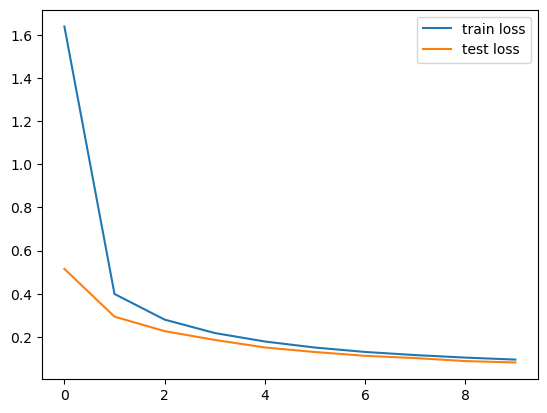

In [26]:
# treino da rede
train_losses, test_losses = fit(model, criterion, optimizer, train_loader, test_loader, epochs = 10)
plot_losses(train_losses, test_losses)


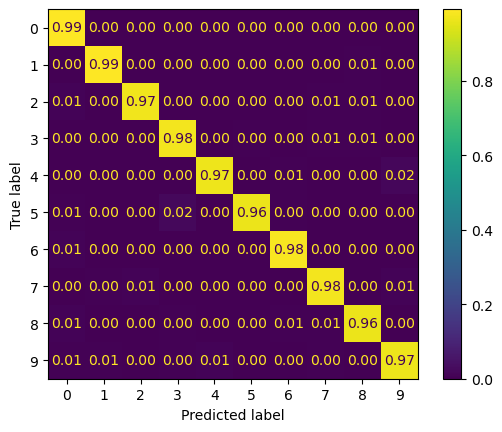

In [27]:
# Avaliando com o conjunto de teste
predicted, true_labels = predict_module(model, test_loader)
matriz_confusao(true_labels, predicted, [0,1,2,3,4,5,6,7,8,9])
